In [ ]:
from evaluations.ism_fdfr import matching_score_genimage_id_li
from PIL import Image, ImageDraw, ImageFont

In [ ]:
celeb20_img_id_list = ['ariana', 'beyonce', 'bruce', 'cristiano', 'ellen', 'emma', 'george', 'jackie', 'james',
                       'johnny', 'justin', 'kate', 'leonardo', 'lucy', 'morgan', 'oprah', 'rihanna', 'shah', 'shirley',
                       'taylor']
myfriends_img_id_list = ['amy', 'kiat', 'qian', 'yuexin', 'ziyi']

In [ ]:
def ism_fd(dataset, img_id, img_paths):
    clean_img_paths = [f"{dataset}/{img_id}/set_A", f"{dataset}/{img_id}/set_B",
                       f"{dataset}/{img_id}/set_C"]

    ism_li, fd_li = matching_score_genimage_id_li(img_paths, clean_img_paths)
    return ism_li, fd_li

In [ ]:
def plot_defenses(name):
    dataset = 'myfriends' if name in myfriends_img_id_list else 'celeb20'
    # Open your 8 images (assuming all images are the same size)
    image_files = [f'dreambooth-outputs/{name}_aspl_adavoc/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_ape/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_bf/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_bf_gn/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_diffpure/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_gn/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_gn_bf/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png',
                   f'dreambooth-outputs/{name}_aspl_pdmpure/checkpoint-1000/dreambooth/a_photo_of_sks_person/0_0.png']
    images = [Image.open(img) for img in image_files]
    
    # Assuming all images have the same size, get the dimensions
    width, height = images[0].size

    # Create a new blank image with width of 2 columns and height of 4 rows
    new_image = Image.new('RGB', (4 * width, 2 * height))

    # Set up font for drawing text (optional: specify a font path if custom fonts are needed)
    font = ImageFont.truetype("arial.ttf", 40)
    font.size = 40

    # calculate ISM and FDR
    ism_li, fd_li = ism_fd(dataset, name, image_files)
    captions = [f"%s ISM: %.2f FD: %d" % ((i.split('/')[1])[len(name) + 6:], ism, fd) for i, ism, fd in zip(image_files, ism_li, fd_li)]

    # Paste the images and draw SSIM and PSNR values
    for i, (img, c) in enumerate(zip(images, captions)):
        # Create a copy of the image to draw on
        img_copy = img.copy()

        # Initialize drawing context
        draw = ImageDraw.Draw(img_copy)

        # Define text to draw (SSIM and PSNR)
        text = c

        # Draw text at the bottom of the image
        text_position = (10, height - 50)  # Position at the bottom-left corner with padding
        draw.text(text_position, text, font=font, fill="white", stroke_width=2, stroke_fill="black")  # White color text, black outline

        # Calculate where to paste the image in the grid
        x = (i % 4) * width
        y = (i // 4) * height
        new_image.paste(img_copy, (x, y))

    # Save the resulting image
    new_image.save('graphs/defenses.jpg')

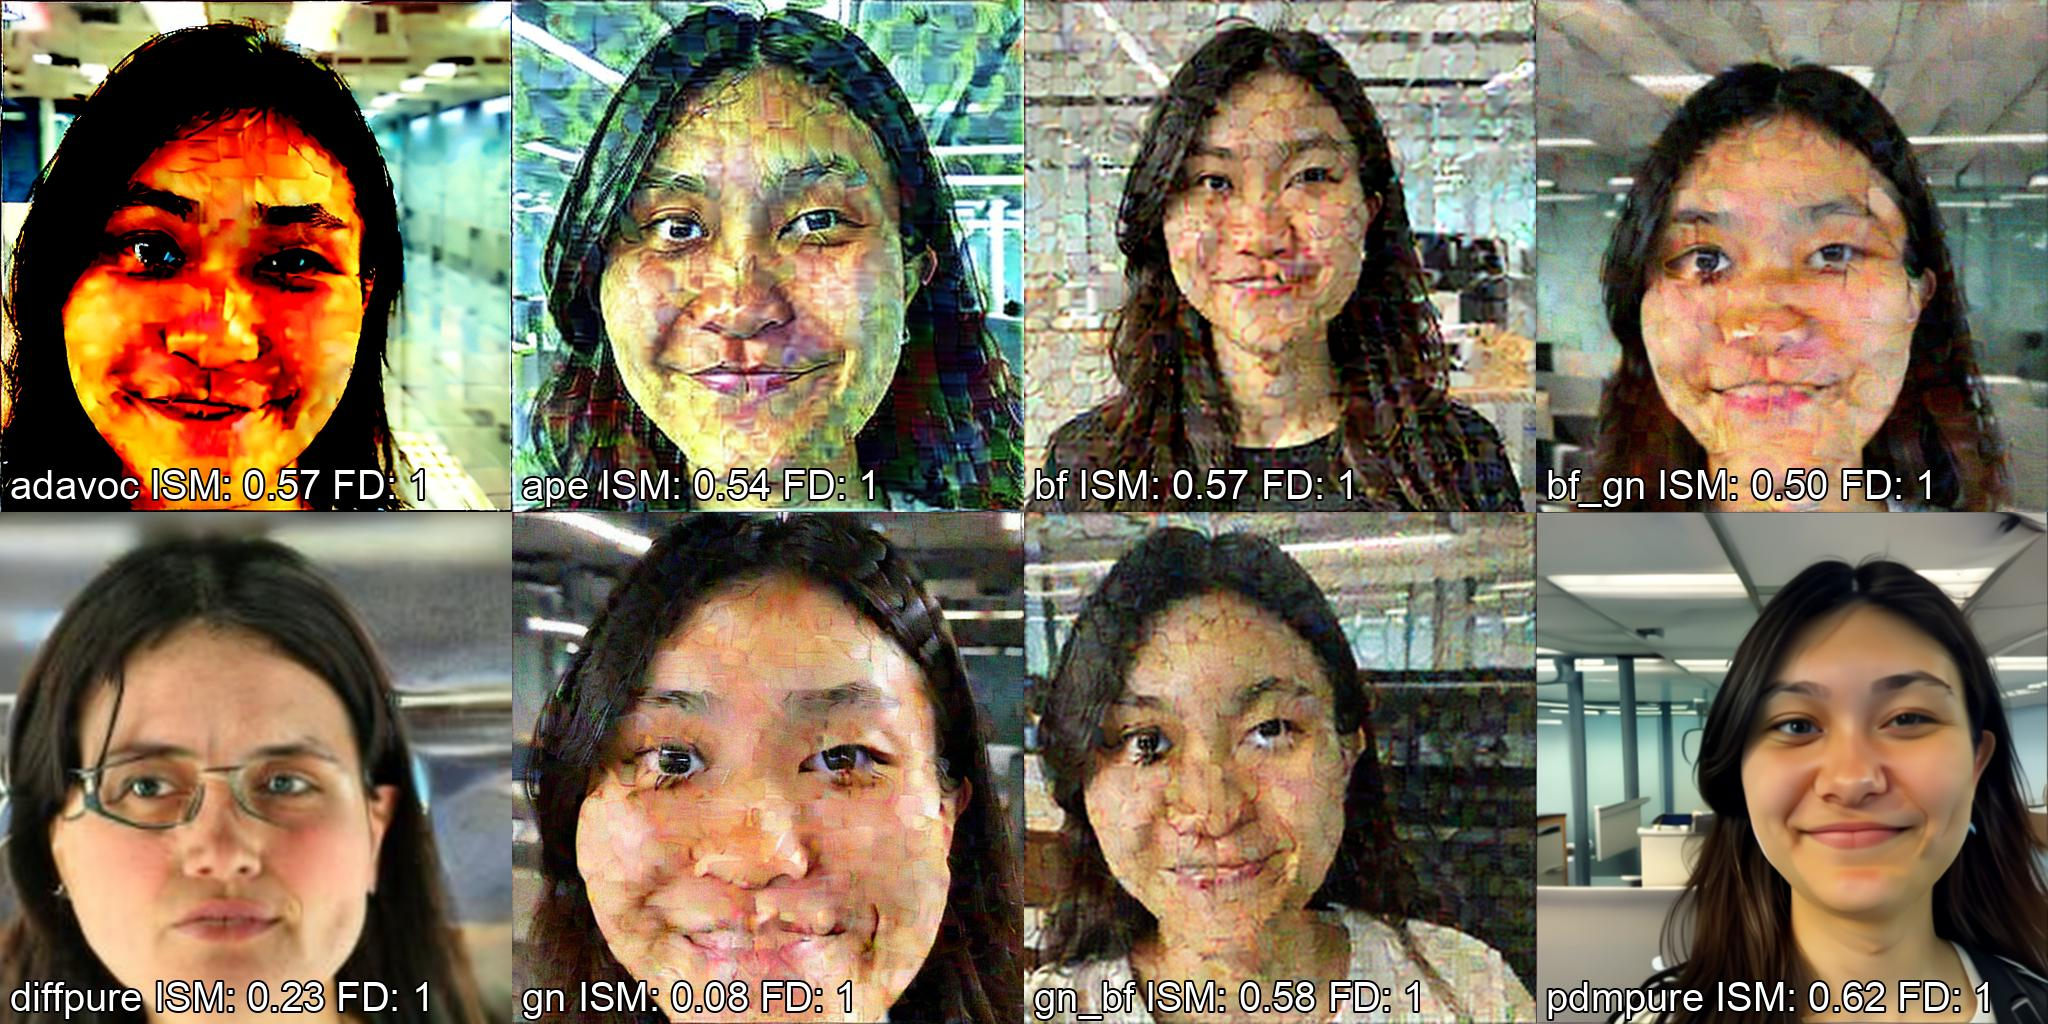

In [3]:
from IPython.display import Image
Image(filename='graphs/defenses.jpg') 